### Column Description of car-mpg dataset

In [1]:
#Car Name – Name of the car

#Cyl – No of cylinders in the car – Multivalued discrete

#Disp – Displacement – continuous

#Hp – Horsepower – continuous

#Wt – Weight – continuous

#Acc – Accleration – continuous

#Yr – Model of the car – Multivalued discrete

### Importing necessary libraries

In [2]:
#importing the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

## 1.EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns)

In [3]:
# Read the car-mpg dataset into a pandas dataframe
df = pd.read_csv('cars-dataset.csv')
df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [4]:
# dataset is consisting of 398 records and 8 features
df.shape

(398, 8)

In [5]:
df['car name'].nunique()

305

In [6]:
#car name column is non-numeric column
#since car name is unique and does not have any impact on model building, we can drop it
df.drop('car name',axis=1,inplace=True)

In [7]:
#No missing values are found in this dataset
#hp column is misinterpreted as object type i.e some of the records are not numeric in that column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null object
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 21.9+ KB


In [8]:
#converting hp column into numeric column by handling '?' values with median of the column
print((df['hp']=='?').sum())
df['hp']=df['hp'].replace('?',np.nan)
df['hp']=df['hp'].astype('float64')
df['hp'].fillna(df['hp'].median(),inplace=True)
df.info()

6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [9]:
df.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504,12.0,70,18.0
1,8,350.0,165.0,3693,11.5,70,15.0
2,8,318.0,150.0,3436,11.0,70,18.0
3,8,304.0,150.0,3433,12.0,70,16.0
4,8,302.0,140.0,3449,10.5,70,17.0


### 2.Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset)

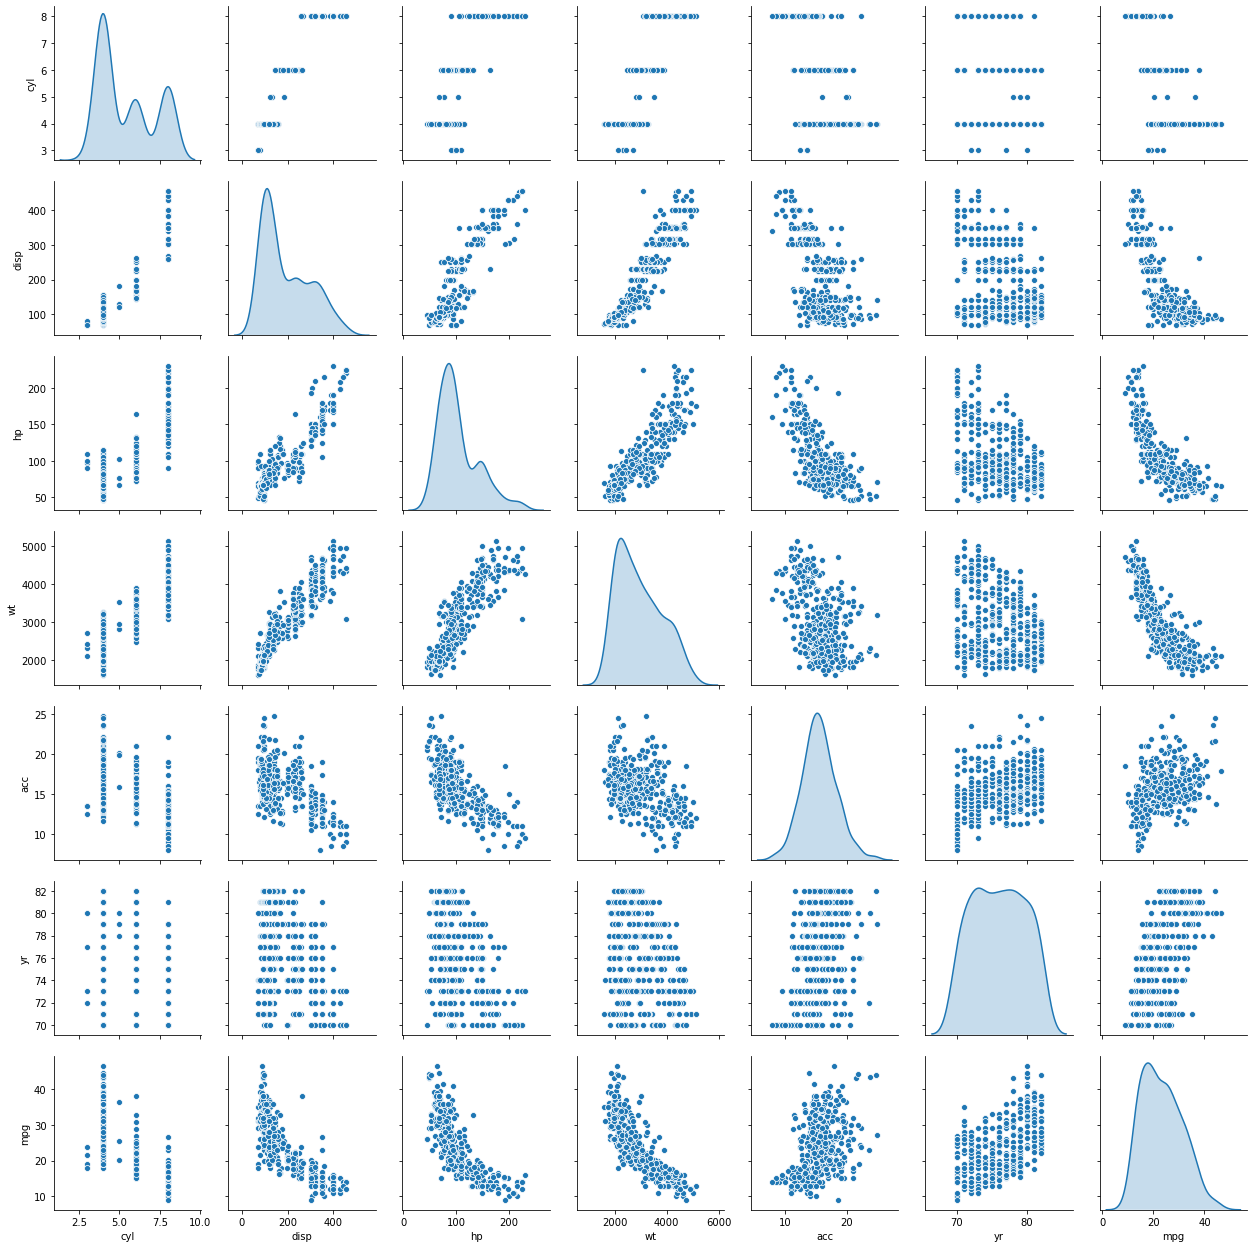

In [10]:
sns.pairplot(df,diag_kind='kde')

#### Inference :

In [11]:
# There is a possibilty of 3 to 9 clusters in this dataset .Three different peak  observed in data set in cyl, disp and hp.
# acc is almost normally distributed.
# Positive correlation observed between hp and wt.


### Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters

In [12]:
from sklearn.cluster import KMeans
# Let us check optimal number of clusters-

cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2.896351e+08
1,2,7.428941e+07
2,3,3.420799e+07
3,4,1.905652e+07
4,5,1.376895e+07
5,6,1.032111e+07
6,7,7.662720e+06
7,8,5.663733e+06
8,9,4.729973e+06


### Elbow plot

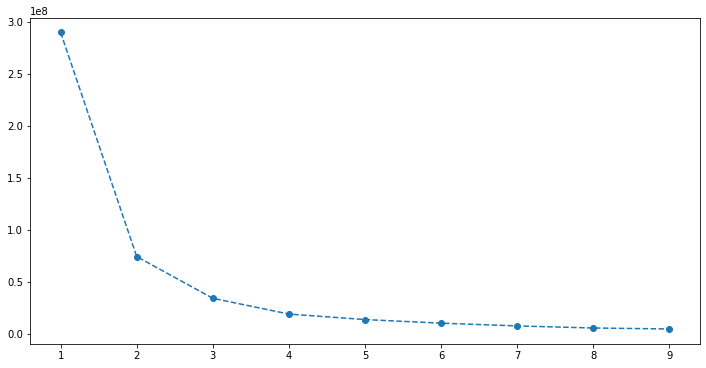

In [13]:

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" ,linestyle='dashed')

In [14]:
#As per the elbow method optimal number of cluster is 3 .

In [15]:
kmeans = KMeans(n_clusters=3,n_init=5)
kmeans = kmeans.fit(df)
labels = kmeans.predict(df)
df['labels']=labels
df.head()

,cyl,disp,hp,wt,acc,yr,mpg,labels
0,8,307.0,130.0,3504,12.0,70,18.0,2
1,8,350.0,165.0,3693,11.5,70,15.0,1
2,8,318.0,150.0,3436,11.0,70,18.0,2
3,8,304.0,150.0,3433,12.0,70,16.0,2
4,8,302.0,140.0,3449,10.5,70,17.0,2


In [16]:
cluster0=df[df['labels']==0].drop('labels',axis=1)
cluster1=df[df['labels']==1].drop('labels',axis=1)
cluster2=df[df['labels']==2].drop('labels',axis=1)

In [17]:
cluster1.head()

,cyl,disp,hp,wt,acc,yr,mpg
1,8,350.0,165.0,3693,11.5,70,15.0
5,8,429.0,198.0,4341,10.0,70,15.0
6,8,454.0,220.0,4354,9.0,70,14.0
7,8,440.0,215.0,4312,8.5,70,14.0
8,8,455.0,225.0,4425,10.0,70,14.0


### Use linear regression model on different clusters separately and print the coefficients of the models individually 

In [18]:
from sklearn.linear_model import LinearRegression

#### Linear Regression on cluster 0

In [19]:

X=cluster0.drop('mpg',axis=1)
y=cluster0['mpg']
lr=LinearRegression()
lr.fit(X,y)
print(' coefficients of Linear regression model for cluster0 : \n',lr.coef_,'\n Intercept of Linear regression model for cluster0 : ',lr.intercept_)

 coefficients of Linear regression model for cluster0 : 
 [ 2.87001209 -0.04905028 -0.03832201 -0.00664672  0.07905717  0.96583279] 
 Intercept of Linear regression model for cluster0 :  -34.29163911171342


#### Linear Regression on cluster 1

In [20]:

X=cluster1.drop('mpg',axis=1)
y=cluster1['mpg']
lr=LinearRegression()
lr.fit(X,y)
print(' coefficients of Linear regression model for cluster1 : \n',lr.coef_,'\n Intercept of Linear regression model for cluster1 : ',lr.intercept_)

 coefficients of Linear regression model for cluster1 : 
 [-0.48392649  0.02355869 -0.01805643 -0.00325456  0.16280509  0.46028297] 
 Intercept of Linear regression model for cluster1 :  -9.286230145856715


#### Linear Regression on cluster 2

In [21]:

X=cluster2.drop('mpg',axis=1)
y=cluster2['mpg']
lr=LinearRegression()
lr.fit(X,y)
print(' coefficients of Linear regression model for cluster2 : \n',lr.coef_,'\n Intercept of Linear regression model for cluster2 : ',lr.intercept_)

 coefficients of Linear regression model for cluster2 : 
 [-0.04786204 -0.00536886 -0.03736026 -0.00425942 -0.08405454  0.62188676] 
 Intercept of Linear regression model for cluster2 :  -6.558849407965404
